In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers as ly
from tensorflow.keras.models import Sequential

***importing the dataset***

In [2]:
path = '/content/drive/MyDrive/Classroom/car vs bike/new/'
images, labels = [], []
size1, size2 = 256, 256

for idx, k in enumerate(os.listdir(path)):
    print(idx)
    if 'ipynb' in k:
        continue

    subdirectory_path = os.path.join(path, k)
    for i in os.listdir(subdirectory_path):
        img = cv2.imread(os.path.join(subdirectory_path, i), 0)

        if img is not None:
            # Resize the image
            img = cv2.resize(img, (size2, size1))

            # Reshape the image and append to the list
            img = np.array([img]).reshape((size1, size2, 1))
            images.append(img/255)
            labels.append(idx)
        else:
            print(f"Failed to load image: {os.path.join(subdirectory_path, i)}")

images = np.array(images)
labels = np.array(labels)

0
1


In [3]:
print(images.shape)
print(labels.shape)

(3734, 256, 256, 1)
(3734,)


In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(images, labels, test_size=0.1)

In [5]:
model = Sequential()
model.add(ly.Conv2D(32, (3, 3), input_shape=(size1, size2, 1), activation='relu'))
model.add(ly.MaxPooling2D(2, 2))

model.add(ly.Conv2D(64, (3, 3), activation='relu'))
model.add(ly.MaxPooling2D(2, 2))

model.add(ly.Flatten())

model.add(ly.Dense(64, activation='relu'))
model.add(ly.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 64)                1

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=10)

Epoch 1/10
105/105 [==============================] - 18s 53ms/step - loss: 0.6476 - accuracy: 0.7592 - val_loss: 0.3030 - val_accuracy: 0.8663
Epoch 2/10
105/105 [==============================] - 5s 45ms/step - loss: 0.2220 - accuracy: 0.9125 - val_loss: 0.2663 - val_accuracy: 0.8824
Epoch 3/10
105/105 [==============================] - 5s 46ms/step - loss: 0.0928 - accuracy: 0.9690 - val_loss: 0.2600 - val_accuracy: 0.8957
Epoch 4/10
105/105 [==============================] - 5s 49ms/step - loss: 0.0278 - accuracy: 0.9943 - val_loss: 0.2912 - val_accuracy: 0.9144
Epoch 5/10
105/105 [==============================] - 5s 45ms/step - loss: 0.0076 - accuracy: 0.9988 - val_loss: 0.3628 - val_accuracy: 0.8957
Epoch 6/10
105/105 [==============================] - 5s 45ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3880 - val_accuracy: 0.9118
Epoch 7/10
105/105 [==============================] - 5s 47ms/step - loss: 6.7454e-04 - accuracy: 1.0000 - val_loss: 0.4180 - val_accuracy: 0

The value of image is  1


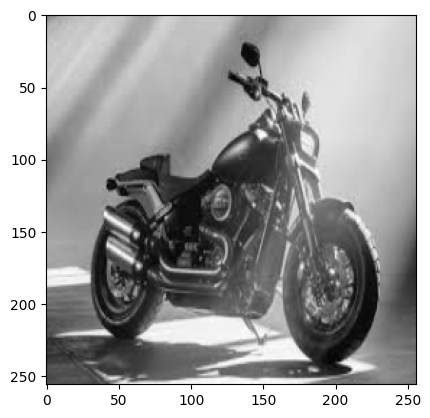

The value of image is  0


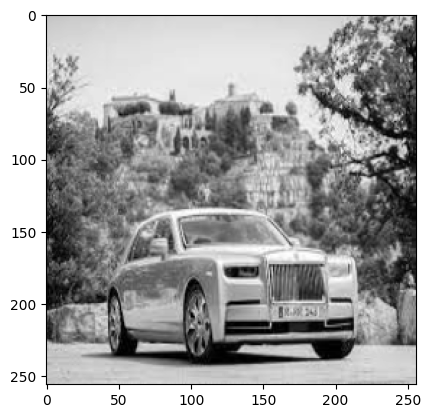

The value of image is  1


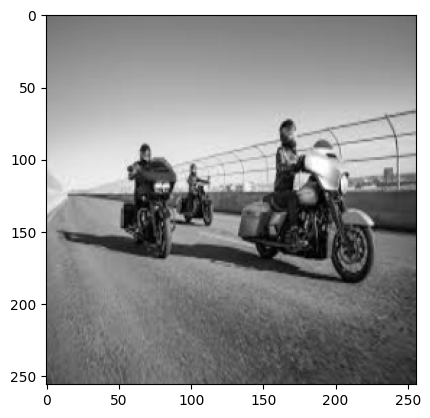

The value of image is  1


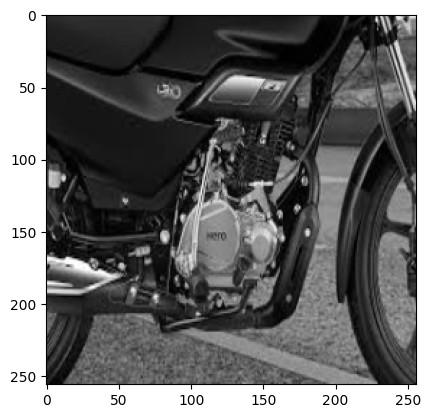

The value of image is  0


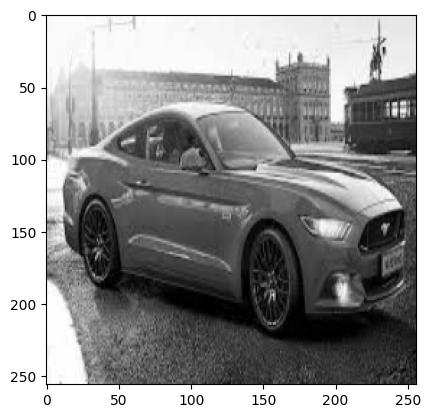

The value of image is  0


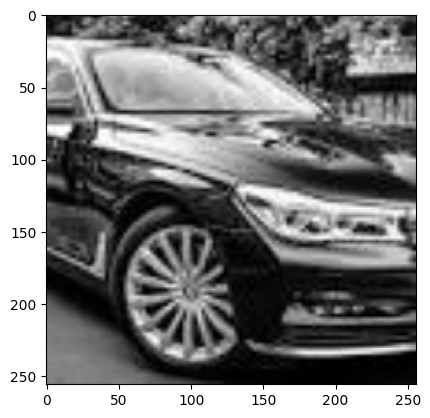

The value of image is  0


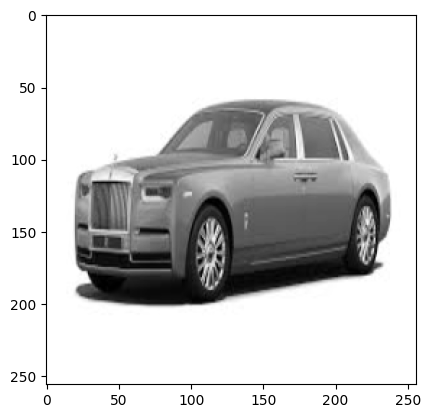

The value of image is  1


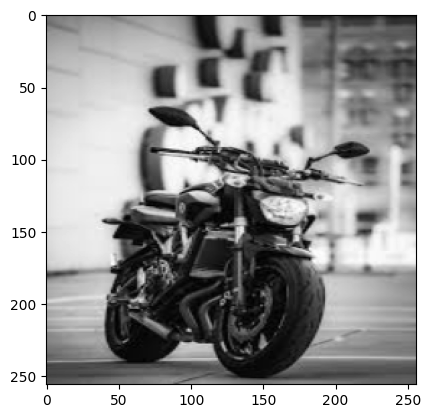

The value of image is  0


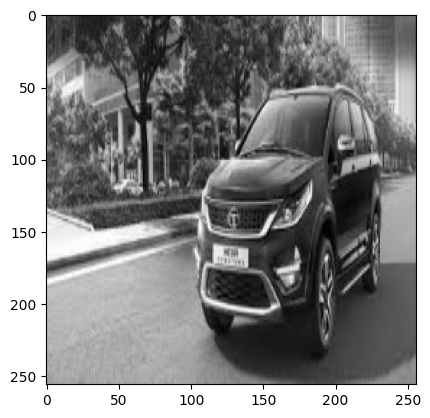

The value of image is  0


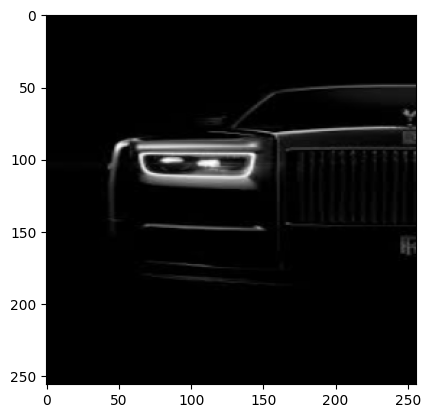

In [7]:
for i in range(10):
  i = np.random.randint(0, len(images))
  print("The value of image is ",labels[i])
  plt.imshow(images[i,:,:,0], cmap = 'gray')
  plt.show()


In [8]:
model.save('car_and_bike.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


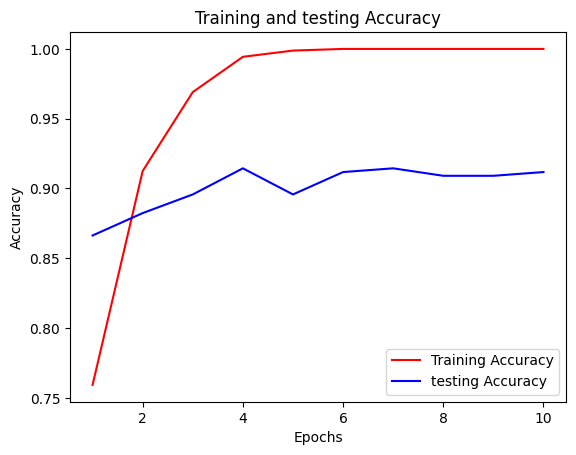

In [9]:
training_accuracy = history.history['accuracy']
testing_accuracy = history.history['val_accuracy']

epochs = range(1, len(training_accuracy) + 1)
plt.plot(epochs, training_accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, testing_accuracy, 'b', label='testing Accuracy')
plt.title('Training and testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

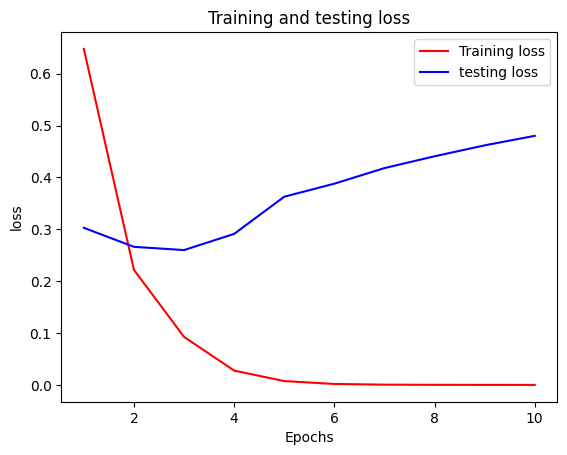

In [10]:
training_loss = history.history['loss']
testing_loss = history.history['val_loss']

epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, 'r', label='Training loss')
plt.plot(epochs, testing_loss, 'b', label='testing loss')
plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

***On validation images***

In [11]:
path = '/content/drive/MyDrive/Classroom/car vs bike/testing_image/'
images_2, labels_2 = [], []
size1, size2 = 256, 256

for idx, k in enumerate(os.listdir(path)):
    print(idx)
    if 'ipynb' in k:
        continue

    subdirectory_path = os.path.join(path, k)
    for i in os.listdir(subdirectory_path):
        img = cv2.imread(os.path.join(subdirectory_path, i), 0)

        if img is not None:
            # Resize the image
            img = cv2.resize(img, (size2, size1))

            # Reshape the image and append to the list
            img = np.array([img]).reshape((size1, size2, 1))
            images_2.append(img/255)
            labels_2.append(idx)
        else:
            print(f"Failed to load image: {os.path.join(subdirectory_path, i)}")

testing_images = np.array(images_2)
testing_labels = np.array(labels_2)

0
1


The value of image is  0


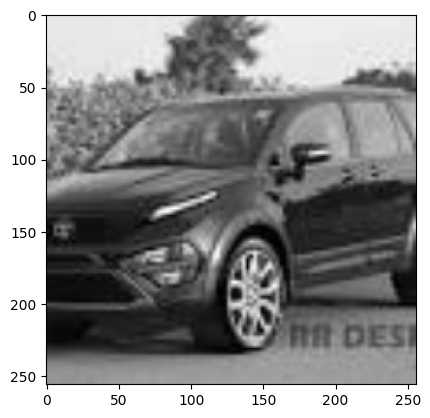

The value of image is  1


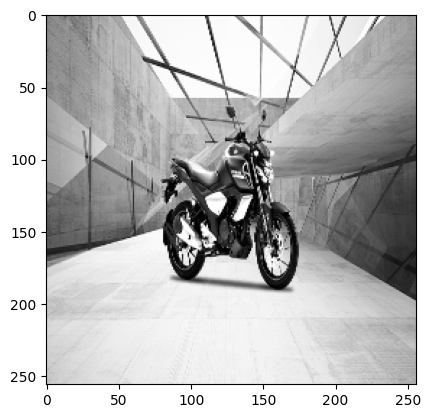

The value of image is  0


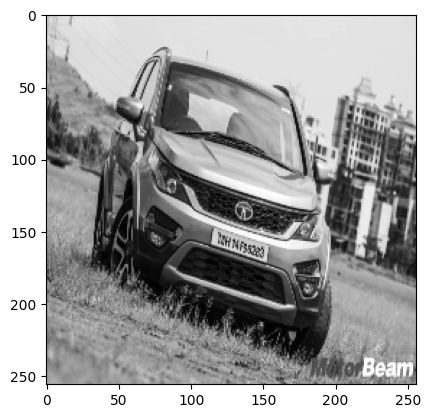

The value of image is  0


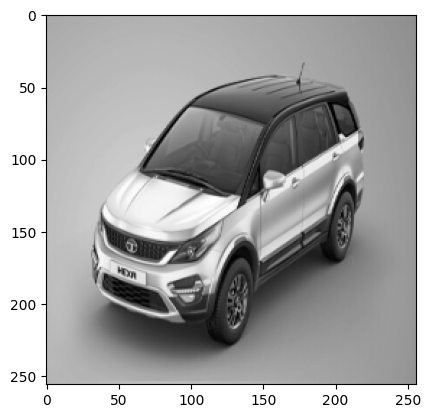

The value of image is  1


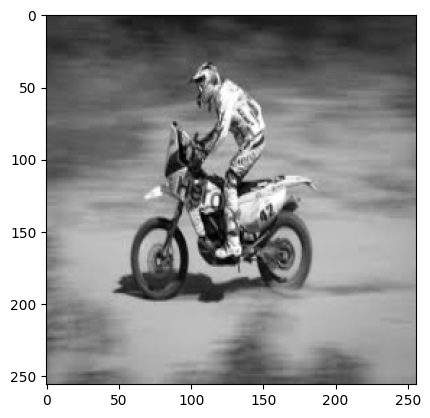

The value of image is  0


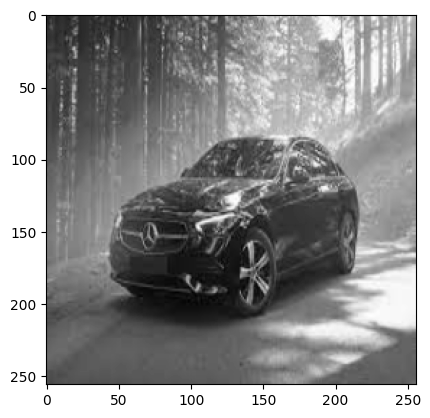

The value of image is  0


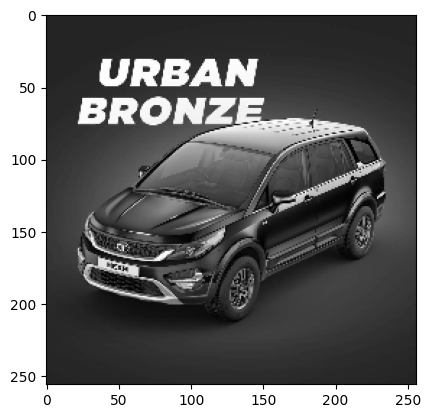

The value of image is  0


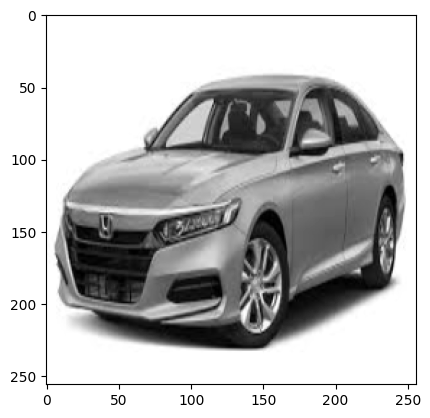

The value of image is  1


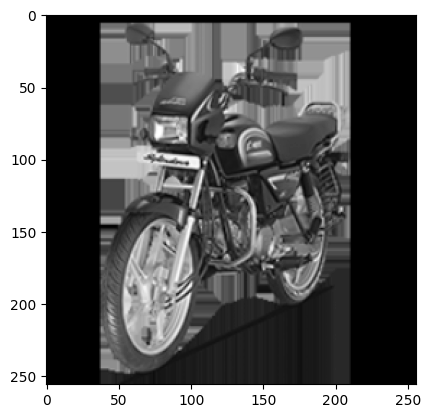

The value of image is  0


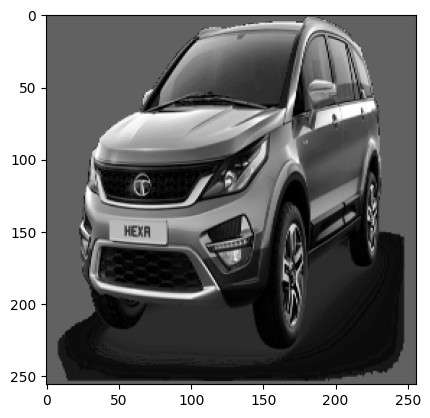

In [12]:
for i in range(10):
  i = np.random.randint(0, len(testing_images))
  print("The value of image is ",testing_labels[i])
  plt.imshow(testing_images[i,:,:,0], cmap = 'gray')
  plt.show()

In [13]:
from tensorflow.keras.models import load_model
model= load_model('car_and_bike.h5')

pred, true = [], []
for i in range(len(testing_images)):
  pred_ = model.predict(np.array([testing_images[i]]), verbose = 0)[0]
  pred.append(np.argmax(pred_))
  true.append(np.argmax(testing_labels[i]))

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, accuracy_score

In [15]:
print(confusion_matrix(pred, true))
print(accuracy_score(pred, true))

[[151]]
1.0


In [16]:
print(classification_report(pred, true))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151

    accuracy                           1.00       151
   macro avg       1.00      1.00      1.00       151
weighted avg       1.00      1.00      1.00       151



In [17]:
f1 = f1_score(pred, true, average = 'micro')
print(f1)

1.0
